# Social Circles Collaborative Crowdsourcing with Clusters
Identify individuals with Common Interests from an anonymous survey of 100 Utah residents

In [1]:
# Install libraries if needed
### pip install pandas-profiling
### pip install pandas-profiling --proxy=<<Your_Proxy_URL>>
# Using conda - You can install using the conda package manager by running
### conda install -c anaconda pandas-profiling

import pandas_profiling as pp



In [2]:
# Install common libraries
import numpy as np
import pandas as pd
import io
import requests

In [3]:
# Cleaned responses to Social Circles survey

# Read local .csv data file
# df = pd.read_csv(input_file, header = 0)

# Read .csv from URL
url="https://raw.githubusercontent.com/daybreaksocialcircles/groupcluster/master/social_circles.csv"
df=pd.read_csv(url)

# Alternate Array formats for different analysis
url_source=requests.get(url).content 
#df=pd.read_csv(io.StringIO(url_source.decode('utf-8')))
hdf=pd.read_csv(io.StringIO(url_source.decode('utf-8')), header=None)
sc_array = np.array(hdf)
print(sc_array.shape)
sc_array
      

(112, 89)


array([['Surrogate_Key', 'Kids', 'ShortHikes', ..., 'Club_Board',
        'Actively_making_friends', 'Helping_others_connect'],
       ['1_Alabama_Alexander_City', 'Yes', nan, ..., nan, nan, '1'],
       ['2_Alabama_Andalusia', 'Yes', '2', ..., nan, nan, nan],
       ...,
       ['109_Arkansas_Searcy', 'Parttime', '2', ..., nan, '1', '1'],
       ['110_Arkansas_Stuttgart', 'No', '2', ..., nan, '1', '1'],
       ['113_California_Alameda', 'Yes', '2', ..., '1', '1', '1']],
      dtype=object)

# Import .csv from behind an http proxy

import io
import requests

proxy_dict = {"http": "<<Your_Proxy_URL>>", "<<Your_Proxy_URL>>"}

url="https://raw.githubusercontent.com/daybreaksocialcircles/groupcluster/master/social_circles.csv"
url_source=requests.get(url, proxies=proxy_dict).content
df=pd.read_csv(io.StringIO(url_source.decode('utf-8')))

# Read .csv with headers included within array
import io
import requests

hdf=pd.read_csv(io.StringIO(url_source.decode('utf-8')), header=None)
sc_array = np.array(hdf)
print(sc_array.shape)
sc_array

In [4]:
df.shape

(111, 89)

In [5]:
# Store the original column names in a python list
original_headers = list(df.columns.values)

# Display the data frame column headers
df.columns

Index(['Surrogate_Key', 'Kids', 'ShortHikes', 'LongHikes', 'Movies_TV',
       'BookClub', 'GamesNight', 'PokerNight', 'Films_Documentaries',
       'CulturalEvents', 'PlayingSports', 'WatchingSports', 'SnowSports',
       'Running', 'ExerciseBudy', 'Biking', 'Camping', 'Crafting',
       'Geocaching', 'SinglesActivities', 'Girls_GuysNightOut', 'KidsNightOut',
       'SingleParents', 'FamilyFunNight', 'IceCreamSocial', 'FoodieClub',
       'WineAndCheese', 'PizzaNights', 'SupperClub', 'ChocolateTasting',
       'Karaoke', 'HolidayParties', 'WaterFights', 'LAN_Gaming',
       'CommunityService', 'Entrepreneurship', 'RockHounding',
       'MusicListening', 'JamSessions', 'Anime', 'Introvert', 'Extrovert',
       'Restaurants', 'Bars', 'Libraries', 'Short_Walks', 'Smokers',
       'Drinkers', 'Fashion_Conscious', 'Religous_Discussions',
       'Political_Discussions', 'Liberal_Views', 'Conservative_Views',
       'Thrifty_Activities', 'Extravagant_Activities', 'Watching_Sports',
       'H

Several Columns contain text values, most columns contain numeric values of 2, 1, NULL, or -1

In [6]:
# Display the first three records in the data frame, head(3)
df[0:3]

,Surrogate_Key,Kids,ShortHikes,LongHikes,Movies_TV,BookClub,GamesNight,PokerNight,Films_Documentaries,CulturalEvents,...,Son7,Son8,Officer,Facebook,PlanEvent,ConnectPeople,TechnicalHelp,Club_Board,Actively_making_friends,Helping_others_connect
0,1_Alabama_Alexander_City,Yes,NaN,NaN,1.0,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2_Alabama_Andalusia,Yes,2.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_Alabama_Anniston,No,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0


In [7]:
# Display the last records in the data frame
# Note that record:110 "113_California_Alameda" is designed as an outlier with the outlying responses to questions
df[105:]

,Surrogate_Key,Kids,ShortHikes,LongHikes,Movies_TV,BookClub,GamesNight,PokerNight,Films_Documentaries,CulturalEvents,...,Son7,Son8,Officer,Facebook,PlanEvent,ConnectPeople,TechnicalHelp,Club_Board,Actively_making_friends,Helping_others_connect
105,106_Arkansas_Osceola,Yes,1.0,NaN,1.0,1.0,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
106,107_Arkansas_Pine_Bluff,Yes,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0
107,108_Arkansas_Rogers,No,2.0,2.0,2.0,1.0,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0
108,109_Arkansas_Searcy,Parttime,2.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0
109,110_Arkansas_Stuttgart,No,2.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
110,113_California_Alameda,Yes,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
# Remove all but the numeric columns
# Some analysis can only be performed on numeric data
ndf = df._get_numeric_data()

# Store the headers for all numeric columns in a list
numeric_headers = list(ndf.columns.values)

# Note that five columns have been removed, but all 111 records are still present
ndf.shape

(111, 84)

In [9]:
# Display a sample of the last of the numeric records
ndf[105:]

,ShortHikes,LongHikes,Movies_TV,BookClub,GamesNight,PokerNight,Films_Documentaries,CulturalEvents,PlayingSports,WatchingSports,...,Son7,Son8,Officer,Facebook,PlanEvent,ConnectPeople,TechnicalHelp,Club_Board,Actively_making_friends,Helping_others_connect
105,1.0,NaN,1.0,1.0,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
106,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0
107,2.0,2.0,2.0,1.0,2.0,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0
108,2.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0
109,2.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
110,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
# Run Pandas Profiling to examine the data and correlations
# Run Profiling report on just the "Interests" columns (Columns 1-40 of the original data frame)
interests_df=df[original_headers[1:40]]
report = pp.ProfileReport(interests_df)
report

Number of variables,39
Number of observations,111
Total Missing (%),38.2%
Total size in memory,33.9 KiB
Average record size in memory,312.7 B
Numeric,29
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,9


In [11]:
# Profile Report on all variables
# Some interesting results, however it is hard to read so much data
## pp.ProfileReport(df)

In [12]:
# Profiling report for just the highly  correlated values to zoom in on the correlations
highly_correlated_headers = ['Anime', 'KidsNightOut', 'Crafting', 'PlayingSports', 'FoodieClub', 'Geocaching', 
                             'JamSessions', 'Karaoke', 'Running', 'LAN_Gaming', 'PizzaNights', 'SingleParents']
report = pp.ProfileReport(df[highly_correlated_headers])
report

Number of variables,12
Number of observations,111
Total Missing (%),40.2%
Total size in memory,10.5 KiB
Average record size in memory,96.7 B
Numeric,7
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,5


# Pearson vs Spearman Correlation Descriptions:
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/




# Alternate formats for array, processed by different methods

In [13]:
# Display last record
sc_array[111]


array(['113_California_Alameda', 'Yes', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', 'Yes', 'Yes', '1', nan, '1', '1', '-1',
       nan, nan, '-1', nan, nan, nan, '1', '1', nan, '1', nan, '-1', '2',
       '1990', '2019', '2', '1990', '2019', '1990', '2019', nan, nan, nan,
       nan, nan, nan, '1990', '2019', nan, nan, nan, nan, nan, nan, '1',
       '1', '1', '1', '1', '1', '1', '1'], dtype=object)

In [14]:
# Display Surrogate Key of last record
sc_array[111][0]

'113_California_Alameda'

# Load Customized names for column headers
names = ['Surrogate_Key', 'Kids', 'ShortHikes', 'LongHikes', 'Movies_TV', 'BookClub', 'GamesNight', 'PokerNight',
         'Films_Documentaries', 'CulturalEvents', 'PlayingSports', 'WatchingSports', 'SnowSports', 'Running', 'ExerciseBudy',
         'Biking', 'Camping', 'Crafting', 'Geocaching', 'SinglesActivities', 'Girls_GuysNightOut', 'KidsNightOut',
         'SingleParents', 'FamilyFunNight', 'IceCreamSocial', 'FoodieClub', 'WineAndCheese', 'PizzaNights', 'SupperClub',
         'ChocolateTasting', 'Karaoke', 'HolidayParties', 'WaterFights', 'LAN_Gaming', 'CommunityService',
         'Entrepreneurship', 'RockHounding', 'MusicListening', 'JamSessions', 'Anime', 'Introvert', 'Extrovert',
         'Restaurants', 'Bars', 'Libraries', 'Short_Walks', 'Smokers', 'Drinkers', 'Fashion_Conscious',
         'Religous_Discussions', 'Political_Discussions', 'Liberal_Views', 'Conservative_Views', 'Thrifty_Activities',
         'Extravagant_Activities', 'Watching_Sports', 'Hanging_Out', 'Big_Crowds', 'Loud_Crowds',
         'Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_sons', 'Min_sons', 'Max_Sons',
         'Daughter1', 'Daughter2', 'Daughter3', 'Daughter4', 'Daughter5', 'Daughter6', 'Daughter7', 'Daughter8',
         'Son1', 'Son2', 'Son3', 'Son4', 'Son5', 'Son6', 'Son7', 'Son8',
         'Officer', 'Facebook', 'PlanEvent', 'ConnectPeople', 'TechnicalHelp', 'Club_Board',
         'Actively_making_friends', 'Helping_others_connect']
sc_data = pd.read_csv(url, names=names)
print(sc_data.shape)
sc_data[:5]


In [15]:
# Change NaN values to 0
NaNs_values = np.isnan(ndf)
ndf[NaNs_values] = 0
sc_matrix = pd.DataFrame.as_matrix(ndf)

C:\Users\jweeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [16]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm


In [17]:
# Define Cluster Model
cluster_model = KMeans(n_clusters=30, random_state=10)

In [18]:
# Fit the model to Social Circles Matrix
cluster_model.fit(sc_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [19]:
# Display the cluster labels assigned to each record (30 clusters created = 0-29)
cluster_model.labels_

array([20, 22,  0,  6, 20, 26, 26, 22, 27, 13,  2,  0,  2, 23, 28, 25, 16,
        8,  1, 10, 26, 12, 26,  2, 11, 26, 19, 10,  7, 26, 17, 26,  2, 26,
       17, 19,  5,  0, 22,  4, 29,  0,  3, 26, 26, 28, 26, 29, 29,  2, 23,
       18, 25, 26, 26,  9,  0, 14,  0, 26, 26, 22, 26, 26, 24, 28, 15,  0,
        3,  0, 19, 26, 26, 24, 26, 20, 17, 26,  2, 24,  0, 26, 26, 26,  0,
       26,  6, 25,  5, 20,  0, 19, 26, 24, 26, 26, 29,  0,  8,  0, 26,  2,
        6,  2, 23,  8,  6, 26, 17, 26, 21])

In [20]:
cluster_labels = cluster_model.fit_predict(sc_matrix)


In [21]:
# Add cluster labels to end of data frame
# cp = connection Predictions Data Frame with firend_cluster column appended to the right of array
cp=df
cp['connection_cluster'] = cluster_labels

In [22]:
# Display first six records, scroll to right to see labels
cp[:6]

,Surrogate_Key,Kids,ShortHikes,LongHikes,Movies_TV,BookClub,GamesNight,PokerNight,Films_Documentaries,CulturalEvents,...,Son8,Officer,Facebook,PlanEvent,ConnectPeople,TechnicalHelp,Club_Board,Actively_making_friends,Helping_others_connect,connection_cluster
0,1_Alabama_Alexander_City,Yes,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20
1,2_Alabama_Andalusia,Yes,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
2,3_Alabama_Anniston,No,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0
3,4_Alabama_Athens,Yes,2.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
4,5_Alabama_Atmore,Yes,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20
5,6_Alabama_Auburn,No,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26


In [23]:
# Find clusters of connections for '1_Alabama_Alexander_City'

# Store record for '1_Alabama_Alexander_City'
match_me = cp[cp.Surrogate_Key=='1_Alabama_Alexander_City']
print(match_me.shape)

# Extract the label of cluster from record
match_cluster_label = match_me.at[0,'connection_cluster']
print(match_cluster_label)

# Print all records with the name cluster label
cp[cp.connection_cluster==match_cluster_label]


(1, 90)
20


,Surrogate_Key,Kids,ShortHikes,LongHikes,Movies_TV,BookClub,GamesNight,PokerNight,Films_Documentaries,CulturalEvents,...,Son8,Officer,Facebook,PlanEvent,ConnectPeople,TechnicalHelp,Club_Board,Actively_making_friends,Helping_others_connect,connection_cluster
0,1_Alabama_Alexander_City,Yes,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20
4,5_Alabama_Atmore,Yes,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20
75,76_Arizona_Tempe,Yes,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,20
89,90_Arkansas_Crossett,Yes,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20


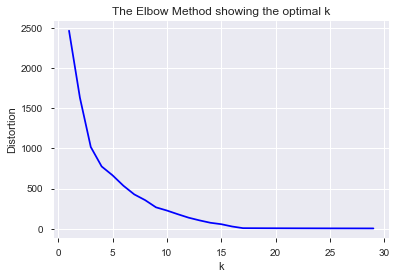

In [24]:
# Determine optimal values for K

# https://www.udemy.com/clustering-classification-with-machine-learning-in-python/learn/lecture/9333372#overview
# Clustering & Classification With Machine Learning in Python

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sc_matrix)
    kmeanModel.fit(sc_matrix)
    distortions.append(sum(np.min(cdist(sc_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sc_matrix.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# PCA - Primary Component Analysis
Transform the 84 variables used in the predictions into (2) variables which can be displayed in a two-dimensional graph

PCA attempted to be explained visually:
http://setosa.io/ev/principal-component-analysis/

PCA summarized in statistical terms:
https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2



In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(ndf) 
print(ndf.shape)

(111, 84)


C:\Users\jweeks\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [26]:
# Scale the data to reduce the impact of skewed data on PCA
scaled_data = scaler.transform(ndf)

C:\Users\jweeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [27]:
# Calculate four principle components to attempt to explain the current 84 fields
pca = PCA(n_components=4)

In [28]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
x_pca_ndf = pca.transform(scaled_data)

In [30]:
x_pca_4d = pd.DataFrame(x_pca_ndf)

x_pca_4d.columns = ['PC1','PC2', 'PC3', 'PC4']
x_pca_4d[100:]

,PC1,PC2,PC3,PC4
100,-0.082937,-4.484712,-0.087243,-0.934654
101,-4.502794,2.065813,-0.148859,2.166243
102,3.217845,2.311282,2.457651,-1.795060
103,-0.327994,0.170570,-2.356229,0.299865
104,-0.220716,-0.153845,-2.941963,1.610712
105,1.267683,3.937700,3.200726,-3.927113
106,4.471975,2.316056,-3.213923,-0.855359
107,-0.582706,-3.376707,-1.656932,-0.802197
108,0.316902,0.884127,-0.262996,-0.746269
109,-0.151248,-3.370711,0.176222,0.523783


In [31]:
print(pca.explained_variance_ratio_) #variance explained by the first PC
# The four principle components developed only explain 11.5%, 7.8%, 5.6%, and 5.4% of variance of the data

[0.11538536 0.07849083 0.05645131 0.05334333]


In [32]:
# Reducing the number of fields to just the "Interests" list increases the explained variance 
pca_interests_df = df[original_headers[2:40]]
print(pca_interests_df.shape)
scaler = StandardScaler()
scaler.fit(pca_interests_df)
scaled_data = scaler.transform(pca_interests_df)
pca = PCA(n_components=5)
pca.fit(scaled_data)
x_pca_interests = pca.transform(scaled_data)
x_pca_5d = pd.DataFrame(x_pca_interests)

x_pca_5d.columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5']
x_pca_5d
print(pca.explained_variance_ratio_)

(111, 38)
[0.19636636 0.08442007 0.07053892 0.05771292 0.04693404]


# Display matching fields between two records

In [33]:
def matches(connection1, connection2):
    merged_list = [[sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i]] for i in range(0, len(sc_array[0]))] 
    for i in range(len(sc_array[0])):
        if sc_array[connection1][i] == sc_array[connection2][i]:
            if sc_array[connection1][i] != '' and sc_array[connection1][i] != '0':
                print(i,sc_array[0][i],sc_array[connection1][i] )


In [34]:
def matches_v(connection1, connection2):
    # print(sc_array[0])
    # print(sc_array[connection1])
    # print(sc_array[connection2])
    merged_list = [[sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i]] for i in range(0, len(sc_array[0]))] 
    for i in range(len(sc_array[0])):
        if sc_array[connection1][i] == sc_array[connection2][i]:
            if sc_array[connection1][i] != '' and sc_array[connection1][i] != '0':
                print(i,sc_array[0][i],sc_array[connection1][i] )
    print()
    print(merged_list)

In [35]:
matches(1,111)

1 Kids Yes
5 BookClub 2
9 CulturalEvents 2
17 Crafting 2
24 IceCreamSocial 2
25 FoodieClub 2
32 WaterFights 2
40 Introvert Yes
45 Short_Walks 1
62 Num_sons 2
81 Officer 1
88 Helping_others_connect 1


In [36]:
# Select a record with which to compare all other records for connections
connection1 = 3

# Create an array to store prediction values
predict_connection = np.zeros(len(sc_array),dtype=
                           [('record', int), ('interests', int), ('likes', int), ('daughters', int), ('sons', int)]
                          )

# Set the first column to the record number so that we can sort by predictions later and retain record number
for i in range(len(predict_connection)):
    predict_connection[i][0] = i+1

#Calculate values over just interests [ShortHikes...Anime]
predict_array = sc_matrix[0:,:38]

# Change Blank Values to '0'
# predict_array[predict_array == ''] = '0'
# Change NaN Values to '0'
# NaNs_values = np.isnan(sc_matrix)
# predict_array[NaNs_values] = 0

for i in range(1,len(predict_array)):
    for j in range(len(predict_array[0])):
        predict_connection[i][1] += int(predict_array[i][j]) * int(predict_array[connection1][j])


In [37]:
# Sort in order of highest matching interests
# Sorts in ascending order, however we want match in descending order
# np.sort(predict_connection,order='interests')


In [38]:
# Sort in descending order, highest matching score first
predict_connection[::-1].sort(order='interests')
# Top 5 matches
print(predict_connection[:5])

[(111, 68, 0, 0, 0) (  4, 62, 0, 0, 0) ( 90, 52, 0, 0, 0)
 ( 33, 52, 0, 0, 0) (  3, 52, 0, 0, 0)]


In [39]:
predict_connection[:10]

array([(111, 68, 0, 0, 0), (  4, 62, 0, 0, 0), ( 90, 52, 0, 0, 0),
       ( 33, 52, 0, 0, 0), (  3, 52, 0, 0, 0), ( 16, 51, 0, 0, 0),
       ( 81, 50, 0, 0, 0), ( 46, 49, 0, 0, 0), ( 43, 47, 0, 0, 0),
       ( 70, 46, 0, 0, 0)],
      dtype=[('record', '<i4'), ('interests', '<i4'), ('likes', '<i4'), ('daughters', '<i4'), ('sons', '<i4')])

In [40]:
predict_connection[:10]['record'].tolist()

[111, 4, 90, 33, 3, 16, 81, 46, 43, 70]

In [41]:
list=predict_connection[:10]['record'].tolist()
for i in list:
    print('Record: ',i)
    matches(3,i)
    print()

Record:  111
2 ShortHikes 2
3 LongHikes 2
5 BookClub 2
6 GamesNight 2
8 Films_Documentaries 2
9 CulturalEvents 2
12 SnowSports 2
25 FoodieClub 2
29 ChocolateTasting 2
31 HolidayParties 2
37 MusicListening 2
40 Introvert Yes
42 Restaurants 1
44 Libraries 1
45 Short_Walks 1
46 Smokers -1
53 Thrifty_Activities 1
54 Extravagant_Activities 1
58 Loud_Crowds -1
82 Facebook 1
83 PlanEvent 1
84 ConnectPeople 1
87 Actively_making_friends 1
88 Helping_others_connect 1

Record:  4
2 ShortHikes 2
4 Movies_TV 1
5 BookClub 2
6 GamesNight 2
9 CulturalEvents 2
12 SnowSports 2
15 Biking 1
25 FoodieClub 2
27 PizzaNights 1
29 ChocolateTasting 2
31 HolidayParties 2
32 WaterFights 1
37 MusicListening 2
41 Extrovert No
42 Restaurants 1
45 Short_Walks 1
46 Smokers -1
53 Thrifty_Activities 1
54 Extravagant_Activities 1
58 Loud_Crowds -1
84 ConnectPeople 1

Record:  90
2 ShortHikes 2
3 LongHikes 2
4 Movies_TV 1
5 BookClub 2
7 PokerNight 1
8 Films_Documentaries 2
9 CulturalEvents 2
15 Biking 1
16 Camping 1
18 Ge

In [42]:
matches_v(3,4)

2 ShortHikes 2
4 Movies_TV 1
5 BookClub 2
6 GamesNight 2
9 CulturalEvents 2
12 SnowSports 2
15 Biking 1
25 FoodieClub 2
27 PizzaNights 1
29 ChocolateTasting 2
31 HolidayParties 2
32 WaterFights 1
37 MusicListening 2
41 Extrovert No
42 Restaurants 1
45 Short_Walks 1
46 Smokers -1
53 Thrifty_Activities 1
54 Extravagant_Activities 1
58 Loud_Crowds -1
84 ConnectPeople 1

[['Surrogate_Key', '3_Alabama_Anniston', '4_Alabama_Athens'], ['Kids', 'No', 'Yes'], ['ShortHikes', '2', '2'], ['LongHikes', '2', '1'], ['Movies_TV', '1', '1'], ['BookClub', '2', '2'], ['GamesNight', '2', '2'], ['PokerNight', '1', nan], ['Films_Documentaries', '2', '1'], ['CulturalEvents', '2', '2'], ['PlayingSports', '1', nan], ['WatchingSports', '1', nan], ['SnowSports', '2', '2'], ['Running', '1', '2'], ['ExerciseBudy', '1', nan], ['Biking', '1', '1'], ['Camping', '1', nan], ['Crafting', nan, nan], ['Geocaching', '1', nan], ['SinglesActivities', nan, nan], ['Girls_GuysNightOut', '1', nan], ['KidsNightOut', nan, nan], ['